# Effectiveness on Python code from popular open-source projects 

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Random functions

Load Evaluation Data

In [312]:
home_dir="/home/m/workhorse/home/beatriz/LExecutor"
random_functions_df = pd.read_csv(home_dir+'/metrics_popular_projects_function_bodies_dataset.csv')
random_functions_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time
0,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,5,5,4,1,1,0.007880
1,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,4,4,3,0,0,0.001013
2,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,3,0,0,0.000731
3,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,2,0,0,0.000933
4,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,2,2,2,1,1,0.006371
...,...,...,...,...,...,...,...,...
7407,./popular_projects_snippets_dataset/scrapy/bod...,PynguinTests,0,0,0,1,1,0.154378
7408,./popular_projects_snippets_dataset/pandas/bod...,PynguinTests,0,0,0,2,1,0.142572
7409,./popular_projects_snippets_dataset/scrapy/bod...,PynguinTests,0,0,0,0,0,0.131013
7410,./popular_projects_snippets_dataset/flask/bodi...,PynguinTests,0,0,0,1,1,0.153872


In [313]:
random_functions_total_lines_df = pd.read_csv(home_dir+'/total_lines_function_bodies_dataset.csv')
random_functions_total_lines_df

,file,total_lines
0,./popular_projects_snippets_dataset/black/bodi...,17
1,./popular_projects_snippets_dataset/black/bodi...,2
2,./popular_projects_snippets_dataset/black/bodi...,8
3,./popular_projects_snippets_dataset/black/bodi...,2
4,./popular_projects_snippets_dataset/black/bodi...,8
...,...,...
995,./popular_projects_snippets_dataset/tensorflow...,2
996,./popular_projects_snippets_dataset/tensorflow...,1
997,./popular_projects_snippets_dataset/tensorflow...,7
998,./popular_projects_snippets_dataset/tensorflow...,3


In [314]:
random_functions_As_Is_df = random_functions_df[random_functions_df['predictor'] == 'AsIs']
files_with_results_As_Is = random_functions_As_Is_df.file.unique()
files_without_results_As_Is = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_As_Is)]

random_functions_Naive_df = random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']
files_with_results_Naive = random_functions_Naive_df.file.unique()
files_without_results_Naive = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Naive)]

random_functions_Random_df = random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']
files_with_results_Random = random_functions_Random_df.file.unique()
files_without_results_Random = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Random)]

random_functions_Frequency_df = random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']
files_with_results_Frequency = random_functions_Frequency_df.file.unique()
files_without_results_Frequency = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Frequency)]

random_functions_Fine_Grained_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']
files_with_results_Fine_Grained = random_functions_Fine_Grained_df.file.unique()
files_without_results_Fine_Grained = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Fine_Grained)]


random_functions_Deterministic_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']
files_with_results_Deterministic = random_functions_Deterministic_df.file.unique()
files_without_results_Deterministic = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Deterministic)]

random_functions_Randomized_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']
files_with_results_Randomized = random_functions_Randomized_df.file.unique()
files_without_results_Randomized = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Randomized)]

random_functions_Pynguin_df = random_functions_df[random_functions_df['predictor'] == 'PynguinTests']
files_with_results_Pynguin = random_functions_Pynguin_df.file.unique()
files_without_results_Pynguin = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Pynguin)]

In [315]:
files_without_results_As_Is = files_without_results_As_Is
files_without_results_As_Is['predictor'] = 'AsIs'
files_without_results_As_Is['covered_iids'] = 0
files_without_results_As_Is['total_uses'] = 0
files_without_results_As_Is['guided_uses'] = 0
files_without_results_As_Is['executed_lines'] = 0
files_without_results_As_Is['covered_lines'] = 0
files_without_results_As_Is['execution_time'] = 0

files_without_results_Naive = files_without_results_Naive
files_without_results_Naive['predictor'] = 'NaiveValuePredictor'
files_without_results_Naive['covered_iids'] = 0
files_without_results_Naive['total_uses'] = 0
files_without_results_Naive['guided_uses'] = 0
files_without_results_Naive['executed_lines'] = 0
files_without_results_Naive['covered_lines'] = 0
files_without_results_Naive['execution_time'] = 0

files_without_results_Random = files_without_results_Random
files_without_results_Random['predictor'] = 'RandomPredictor'
files_without_results_Random['covered_iids'] = 0
files_without_results_Random['total_uses'] = 0
files_without_results_Random['guided_uses'] = 0
files_without_results_Random['executed_lines'] = 0
files_without_results_Random['covered_lines'] = 0
files_without_results_Random['execution_time'] = 0

files_without_results_Frequency = files_without_results_Frequency
files_without_results_Frequency['predictor'] = 'FrequencyValuePredictor'
files_without_results_Frequency['covered_iids'] = 0
files_without_results_Frequency['total_uses'] = 0
files_without_results_Frequency['guided_uses'] = 0
files_without_results_Frequency['executed_lines'] = 0
files_without_results_Frequency['covered_lines'] = 0
files_without_results_Frequency['execution_time'] = 0

files_without_results_Fine_Grained = files_without_results_Fine_Grained
files_without_results_Fine_Grained['predictor'] = 'CodeT5ValuePredictor_fine_grained'
files_without_results_Fine_Grained['covered_iids'] = 0
files_without_results_Fine_Grained['total_uses'] = 0
files_without_results_Fine_Grained['guided_uses'] = 0
files_without_results_Fine_Grained['executed_lines'] = 0
files_without_results_Fine_Grained['covered_lines'] = 0
files_without_results_Fine_Grained['execution_time'] = 0

files_without_results_Deterministic = files_without_results_Deterministic
files_without_results_Deterministic['predictor'] = 'CodeT5ValuePredictor_coarse_grained_deterministic'
files_without_results_Deterministic['covered_iids'] = 0
files_without_results_Deterministic['total_uses'] = 0
files_without_results_Deterministic['guided_uses'] = 0
files_without_results_Deterministic['executed_lines'] = 0
files_without_results_Deterministic['covered_lines'] = 0
files_without_results_Deterministic['execution_time'] = 0

files_without_results_Randomized = files_without_results_Randomized
files_without_results_Randomized['predictor'] = 'CodeT5ValuePredictor_coarse_grained_randomized'
files_without_results_Randomized['covered_iids'] = 0
files_without_results_Randomized['total_uses'] = 0
files_without_results_Randomized['guided_uses'] = 0
files_without_results_Randomized['executed_lines'] = 0
files_without_results_Randomized['covered_lines'] = 0
files_without_results_Randomized['execution_time'] = 0

files_without_results_Pynguin = files_without_results_Pynguin
files_without_results_Pynguin['predictor'] = 'PynguinTests'
files_without_results_Pynguin['covered_iids'] = 0
files_without_results_Pynguin['total_uses'] = 0
files_without_results_Pynguin['guided_uses'] = 0
files_without_results_Pynguin['executed_lines'] = 0
files_without_results_Pynguin['covered_lines'] = 0
files_without_results_Pynguin['execution_time'] = 0


/tmp/ipykernel_49244/1503667806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_without_results_As_Is['predictor'] = 'AsIs'
/tmp/ipykernel_49244/1503667806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_without_results_As_Is['covered_iids'] = 0
/tmp/ipykernel_49244/1503667806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [316]:
random_functions_df = random_functions_df.merge(random_functions_total_lines_df, how='left', on='file')
random_functions_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines
0,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,5,5,4,1,1,0.007880,17
1,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,4,4,3,0,0,0.001013,2
2,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,3,0,0,0.000731,8
3,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,2,0,0,0.000933,2
4,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,2,2,2,1,1,0.006371,8
...,...,...,...,...,...,...,...,...,...
7407,./popular_projects_snippets_dataset/scrapy/bod...,PynguinTests,0,0,0,1,1,0.154378,4
7408,./popular_projects_snippets_dataset/pandas/bod...,PynguinTests,0,0,0,2,1,0.142572,1
7409,./popular_projects_snippets_dataset/scrapy/bod...,PynguinTests,0,0,0,0,0,0.131013,10
7410,./popular_projects_snippets_dataset/flask/bodi...,PynguinTests,0,0,0,1,1,0.153872,1


In [317]:
random_functions_df = pd.concat([random_functions_df, files_without_results_As_Is])
random_functions_df = pd.concat([random_functions_df, files_without_results_Naive])
random_functions_df = pd.concat([random_functions_df, files_without_results_Random])
random_functions_df = pd.concat([random_functions_df, files_without_results_Frequency])
random_functions_df = pd.concat([random_functions_df, files_without_results_Fine_Grained])
random_functions_df = pd.concat([random_functions_df, files_without_results_Deterministic])
random_functions_df = pd.concat([random_functions_df, files_without_results_Randomized])
random_functions_df = pd.concat([random_functions_df, files_without_results_Pynguin])
random_functions_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines
0,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,5,5,4,1,1,0.007880,17
1,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,4,4,3,0,0,0.001013,2
2,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,3,0,0,0.000731,8
3,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,2,0,0,0.000933,2
4,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,2,2,2,1,1,0.006371,8
...,...,...,...,...,...,...,...,...,...
991,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,21
992,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,6
995,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,2
996,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,1


In [318]:
random_functions_df['covered_lines_percentage'] = random_functions_df['covered_lines'] / random_functions_df['total_lines']
random_functions_df['line_execution_time'] = random_functions_df['execution_time'] / random_functions_df['executed_lines']
random_functions_df['completely_executed'] = random_functions_df['total_lines'] - random_functions_df['covered_lines']
random_functions_df['completely_executed'] = [1 if value == 0 else 0 for value in random_functions_df['completely_executed']]
random_functions_df.replace([np.inf, -np.inf], 0, inplace=True)
random_functions_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines,covered_lines_percentage,line_execution_time,completely_executed
0,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,5,5,4,1,1,0.007880,17,0.058824,0.007880,0
1,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,4,4,3,0,0,0.001013,2,0.000000,0.000000,0
2,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,3,0,0,0.000731,8,0.000000,0.000000,0
3,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,3,3,2,0,0,0.000933,2,0.000000,0.000000,0
4,./popular_projects_snippets_dataset/black/bodi...,FrequencyValuePredictor,2,2,2,1,1,0.006371,8,0.125000,0.006371,0
...,...,...,...,...,...,...,...,...,...,...,...,...
991,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,21,0.000000,NaN,0
992,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,6,0.000000,NaN,0
995,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,2,0.000000,NaN,0
996,./popular_projects_snippets_dataset/tensorflow...,PynguinTests,0,0,0,0,0,0.000000,1,0.000000,NaN,0


Overall Comparisson

In [319]:
random_functions_df_grouped = random_functions_df.groupby(by="predictor")[["covered_iids","total_uses","guided_uses","covered_lines","completely_executed", "execution_time"]].sum()
random_functions_df_grouped['Approach'] = ['Pynguin Tests', 'Fine-grained', 'Coarse-grained \n(randomized)', 'Coarse-grained \n(deterministic)', 'Frequency', 'Naive', 'As Is', 'Random']
random_functions_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,completely_executed,execution_time,Approach
predictor,,,,,,,
AsIs,1218,1218,0,154,19,2.414686,Pynguin Tests
CodeT5ValuePredictor_coarse_grained_deterministic,9690,18731,10894,2034,342,469.546773,Fine-grained
CodeT5ValuePredictor_coarse_grained_randomized,9351,11317,6730,1987,338,371.841410,Coarse-grained \n(randomized)
CodeT5ValuePredictor_fine_grained,9591,16859,9781,2019,340,439.997213,Coarse-grained \n(deterministic)
FrequencyValuePredictor,4229,4231,2976,428,76,5.285355,Frequency
NaiveValuePredictor,4229,4231,2976,426,74,5.088755,Naive
PynguinTests,0,0,0,233,18,67.778833,As Is
RandomPredictor,4407,4409,3060,477,80,5.626200,Random


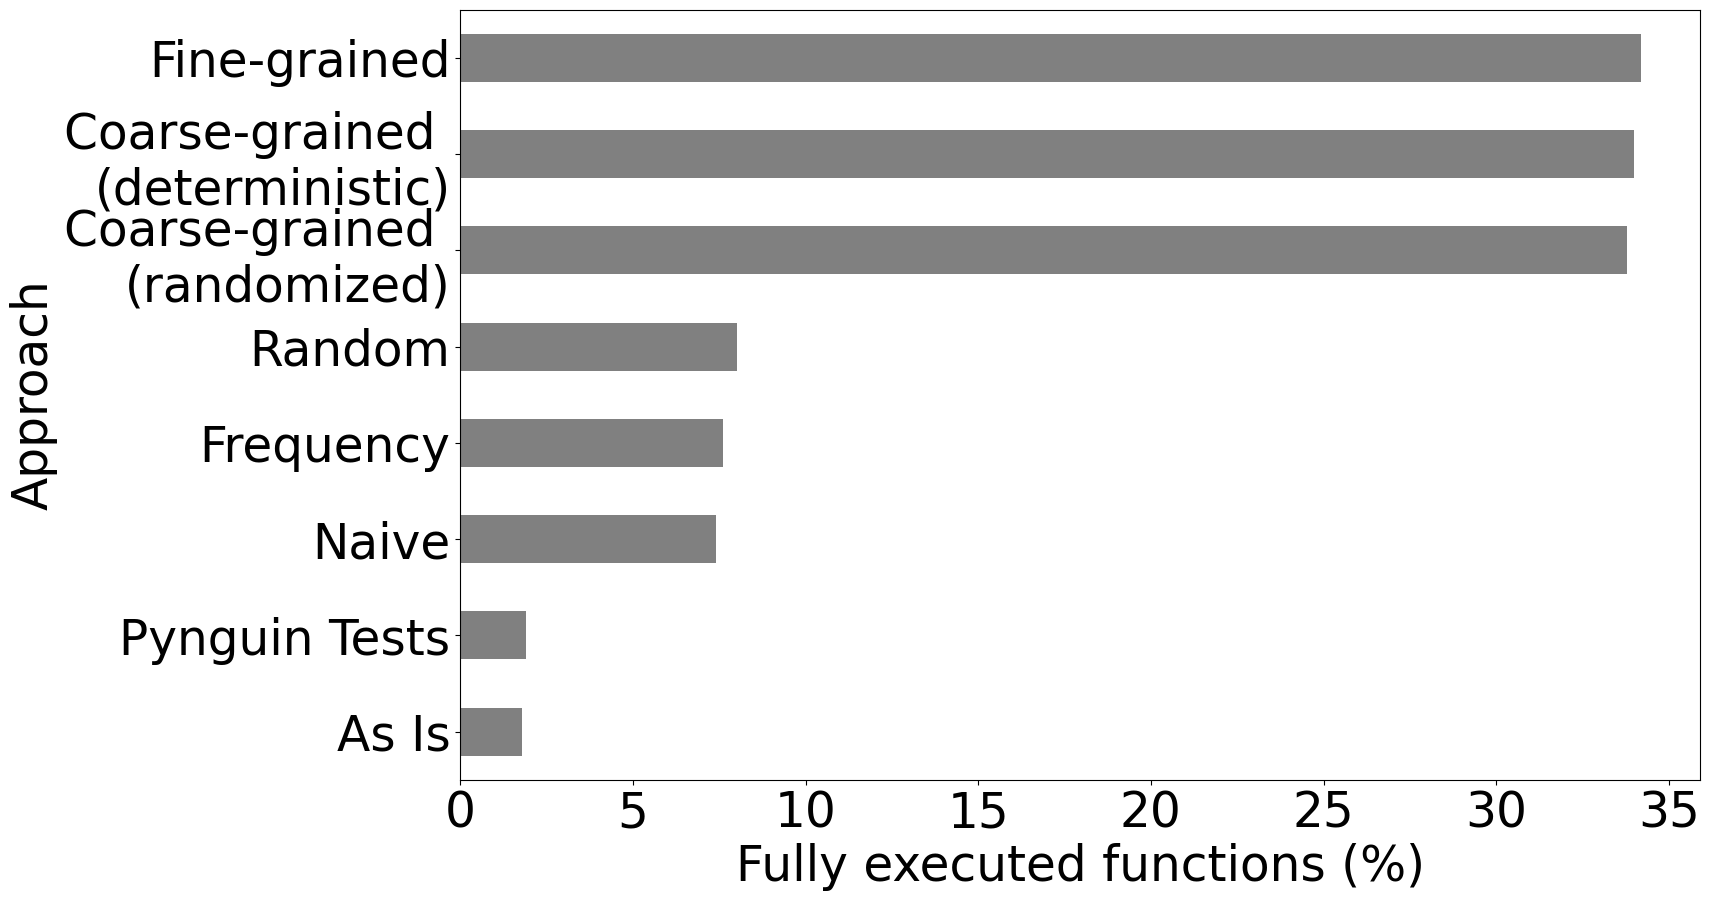

In [320]:
random_functions_df_grouped = random_functions_df_grouped.sort_values(by=['completely_executed'])
random_functions_df_grouped['completely_executed'] = [x * 100 for x in random_functions_df_grouped['completely_executed'] / 1000]

# plt.figure(figsize=(5,10))
plt.rcParams.update({'font.size':35})
random_functions_df_grouped.plot.barh(x='Approach', y=['completely_executed'], color='gray', legend=None)
plt.xlabel("Fully executed functions (%)")
plt.gcf().set_size_inches(16, 10)
plt.savefig("fcts_dataset_full_LC.pdf", bbox_inches = "tight")

In [321]:
random_functions_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,completely_executed,execution_time,Approach
predictor,,,,,,,
PynguinTests,0,0,0,233,1.8,67.778833,As Is
AsIs,1218,1218,0,154,1.9,2.414686,Pynguin Tests
NaiveValuePredictor,4229,4231,2976,426,7.4,5.088755,Naive
FrequencyValuePredictor,4229,4231,2976,428,7.6,5.285355,Frequency
RandomPredictor,4407,4409,3060,477,8.0,5.626200,Random
CodeT5ValuePredictor_coarse_grained_randomized,9351,11317,6730,1987,33.8,371.841410,Coarse-grained \n(randomized)
CodeT5ValuePredictor_fine_grained,9591,16859,9781,2019,34.0,439.997213,Coarse-grained \n(deterministic)
CodeT5ValuePredictor_coarse_grained_deterministic,9690,18731,10894,2034,34.2,469.546773,Fine-grained


In [322]:
random_functions_df_grouped["covered_lines_percentage_"] = random_functions_df_grouped["covered_lines"] / [random_functions_total_lines_df['total_lines'].sum() for e in random_functions_df_grouped["covered_lines"]]
random_functions_df_grouped["execution_time_percentage_"] = random_functions_df_grouped["execution_time"] / random_functions_df_grouped["covered_lines"]
random_functions_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,completely_executed,execution_time,Approach,covered_lines_percentage_,execution_time_percentage_
predictor,,,,,,,,,
PynguinTests,0,0,0,233,1.8,67.778833,As Is,0.033139,0.290896
AsIs,1218,1218,0,154,1.9,2.414686,Pynguin Tests,0.021903,0.015680
NaiveValuePredictor,4229,4231,2976,426,7.4,5.088755,Naive,0.060589,0.011945
FrequencyValuePredictor,4229,4231,2976,428,7.6,5.285355,Frequency,0.060873,0.012349
RandomPredictor,4407,4409,3060,477,8.0,5.626200,Random,0.067842,0.011795
CodeT5ValuePredictor_coarse_grained_randomized,9351,11317,6730,1987,33.8,371.841410,Coarse-grained \n(randomized),0.282606,0.187137
CodeT5ValuePredictor_fine_grained,9591,16859,9781,2019,34.0,439.997213,Coarse-grained \n(deterministic),0.287157,0.217928
CodeT5ValuePredictor_coarse_grained_deterministic,9690,18731,10894,2034,34.2,469.546773,Fine-grained,0.289290,0.230849


### Main results

In [323]:
random_functions_df_grouped = random_functions_df.groupby(by="predictor")[["covered_lines_percentage", "completely_executed", "line_execution_time"]].mean()
random_functions_df_grouped

,covered_lines_percentage,completely_executed,line_execution_time
predictor,,,
AsIs,0.040729,0.019,0.001498
CodeT5ValuePredictor_coarse_grained_deterministic,0.500481,0.342,0.185076
CodeT5ValuePredictor_coarse_grained_randomized,0.493197,0.338,0.167478
CodeT5ValuePredictor_fine_grained,0.498525,0.340,0.178694
FrequencyValuePredictor,0.129595,0.076,0.003613
NaiveValuePredictor,0.127589,0.074,0.003617
PynguinTests,0.040725,0.018,0.012964
RandomPredictor,0.137774,0.080,0.003940


In [324]:
random_functions_df_covered_lines_per_predictor = pd.DataFrame()
random_functions_df_covered_lines_per_predictor['As Is'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Pynguin Tests'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'PynguinTests']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Naive'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Frequency'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Random'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Coarse-grained \n(randomized)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Coarse-grained \n(deterministic)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Fine-grained'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor

,As Is,Pynguin Tests,Naive,Frequency,Random,Coarse-grained \n(randomized),Coarse-grained \n(deterministic),Fine-grained
0,0.0,0.0,5.882353,5.882353,5.882353,35.294118,29.411765,29.411765
1,0.0,0.0,0.000000,0.000000,0.000000,50.000000,50.000000,50.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000
4,12.5,0.0,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
996,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
997,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 3600x600 with 0 Axes>

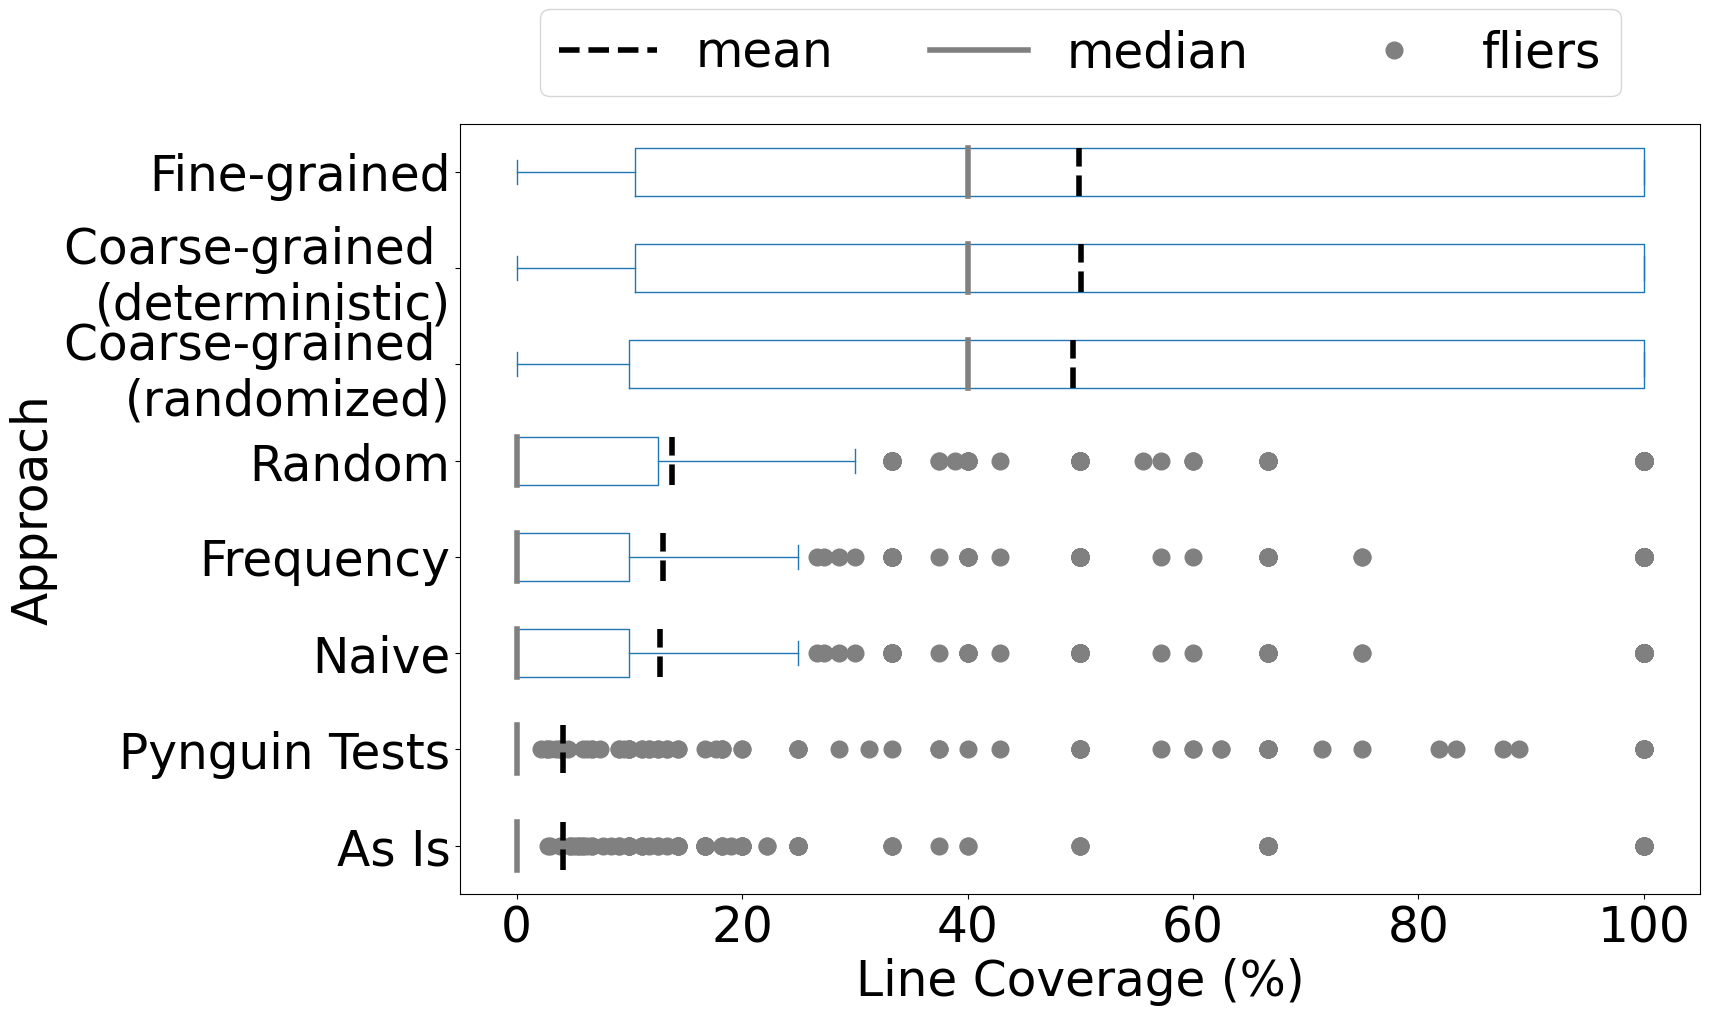

In [325]:
meanlineprops = dict(linestyle='--', linewidth=4, color='black')
medianlineprops = dict(linestyle='-', linewidth=4, color='gray')
flierprops = dict(marker='o',markerfacecolor='gray', markersize=12,
                  linestyle='none', markeredgecolor='gray')

plt.figure(figsize=(36,6))
random_functions_df_covered_lines_per_predictor.plot.box(
    showmeans=True, meanprops=meanlineprops, meanline=True, 
    medianprops=medianlineprops,
    vert=0,
    flierprops=flierprops);

#plt.rcParams.update({'font.size': 35})
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Line Coverage (%)")
plt.ylabel("Approach")
plt.plot([], [], '--', linewidth=4, color='black', label='mean')
plt.plot([], [], '-', linewidth=4, color='gray', label='median')
plt.plot([], [], 'o', markersize=12, color='gray', label='fliers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3)
plt.gcf().set_size_inches(16, 10)
plt.savefig("fcts_dataset_LC.pdf", bbox_inches = "tight")

In [326]:
#files.download("fcts_dataset_LC.pdf") 

AsIs vs others

In [327]:
import scipy.stats as stats
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [328]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [329]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [330]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [331]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [332]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Naive vs others

In [333]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [334]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [335]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [336]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [337]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Random vs others

In [338]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [339]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [340]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [341]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Frequency vs others

In [342]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [343]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [344]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_deterministic vs others

In [345]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [346]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_randomized vs others

In [347]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

## SO snippets

Load Evaluation Data

In [348]:
so_snippets_df = pd.read_csv(home_dir+'/metrics_so_snippets_dataset.csv')
so_snippets_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time
0,./so_snippets_dataset/snippet_100.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.000639
1,./so_snippets_dataset/snippet_102.py,AsIs,2.0,2.0,0.0,0.0,0.0,0.000689
2,./so_snippets_dataset/snippet_105.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001339
3,./so_snippets_dataset/snippet_107.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001344
4,./so_snippets_dataset/snippet_108.py,AsIs,15.0,309.0,0.0,202.0,6.0,0.668670
...,...,...,...,...,...,...,...,...
3130,./so_snippets_dataset/snippet_94.py,CodeT5ValuePredictor_coarse_grained_randomized,2.0,2.0,1.0,1.0,1.0,0.122726
3131,./so_snippets_dataset/snippet_95.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,0.0,2.0,2.0,0.010906
3132,./so_snippets_dataset/snippet_98.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,2.0,0.0,0.0,0.137248
3133,./so_snippets_dataset/snippet_99.py,CodeT5ValuePredictor_coarse_grained_randomized,17.0,17.0,0.0,6.0,6.0,0.022246


In [349]:
so_snippets_total_lines_df = pd.read_csv(home_dir+'/total_lines_so_snippets_dataset.csv')

In [350]:
so_snippets_As_Is_df = so_snippets_df[so_snippets_df['predictor'] == 'AsIs']
files_with_results_As_Is = so_snippets_As_Is_df.file.unique()
files_without_results_As_Is = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_As_Is)]

so_snippets_Naive_df = so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']
files_with_results_Naive = so_snippets_Naive_df.file.unique()
files_without_results_Naive = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Naive)]

so_snippets_Random_df = so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']
files_with_results_Random = so_snippets_Random_df.file.unique()
files_without_results_Random = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Random)]

so_snippets_Frequency_df = so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']
files_with_results_Frequency = so_snippets_Frequency_df.file.unique()
files_without_results_Frequency = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Frequency)]

so_snippets_Fine_Grained_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']
files_with_results_Fine_Grained = so_snippets_Fine_Grained_df.file.unique()
files_without_results_Fine_Grained = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Fine_Grained)]

so_snippets_Deterministic_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']
files_with_results_Deterministic = so_snippets_Deterministic_df.file.unique()
files_without_results_Deterministic = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Deterministic)]

so_snippets_Randomized_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']
files_with_results_Randomized = so_snippets_Randomized_df.file.unique()
files_without_results_Randomized = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Randomized)]

In [351]:
files_without_results_As_Is = files_without_results_As_Is
files_without_results_As_Is['predictor'] = 'AsIs'
files_without_results_As_Is['covered_iids'] = 0
files_without_results_As_Is['total_uses'] = 0
files_without_results_As_Is['guided_uses'] = 0
files_without_results_As_Is['executed_lines'] = 0
files_without_results_As_Is['covered_lines'] = 0
files_without_results_As_Is['execution_time'] = 0

files_without_results_Naive = files_without_results_Naive
files_without_results_Naive['predictor'] = 'NaiveValuePredictor'
files_without_results_Naive['covered_iids'] = 0
files_without_results_Naive['total_uses'] = 0
files_without_results_Naive['guided_uses'] = 0
files_without_results_Naive['executed_lines'] = 0
files_without_results_Naive['covered_lines'] = 0
files_without_results_Naive['execution_time'] = 0

files_without_results_Random = files_without_results_Random
files_without_results_Random['predictor'] = 'RandomPredictor'
files_without_results_Random['covered_iids'] = 0
files_without_results_Random['total_uses'] = 0
files_without_results_Random['guided_uses'] = 0
files_without_results_Random['executed_lines'] = 0
files_without_results_Random['covered_lines'] = 0
files_without_results_Random['execution_time'] = 0

files_without_results_Frequency = files_without_results_Frequency
files_without_results_Frequency['predictor'] = 'FrequencyValuePredictor'
files_without_results_Frequency['covered_iids'] = 0
files_without_results_Frequency['total_uses'] = 0
files_without_results_Frequency['guided_uses'] = 0
files_without_results_Frequency['executed_lines'] = 0
files_without_results_Frequency['covered_lines'] = 0
files_without_results_Frequency['execution_time'] = 0

files_without_results_Fine_Grained = files_without_results_Fine_Grained
files_without_results_Fine_Grained['predictor'] = 'CodeT5ValuePredictor_fine_grained'
files_without_results_Fine_Grained['covered_iids'] = 0
files_without_results_Fine_Grained['total_uses'] = 0
files_without_results_Fine_Grained['guided_uses'] = 0
files_without_results_Fine_Grained['executed_lines'] = 0
files_without_results_Fine_Grained['covered_lines'] = 0
files_without_results_Fine_Grained['execution_time'] = 0

files_without_results_Deterministic = files_without_results_Deterministic
files_without_results_Deterministic['predictor'] = 'CodeT5ValuePredictor_coarse_grained_deterministic'
files_without_results_Deterministic['covered_iids'] = 0
files_without_results_Deterministic['total_uses'] = 0
files_without_results_Deterministic['guided_uses'] = 0
files_without_results_Deterministic['executed_lines'] = 0
files_without_results_Deterministic['covered_lines'] = 0
files_without_results_Deterministic['execution_time'] = 0

files_without_results_Randomized = files_without_results_Randomized
files_without_results_Randomized['predictor'] = 'CodeT5ValuePredictor_coarse_grained_randomized'
files_without_results_Randomized['covered_iids'] = 0
files_without_results_Randomized['total_uses'] = 0
files_without_results_Randomized['guided_uses'] = 0
files_without_results_Randomized['executed_lines'] = 0
files_without_results_Randomized['covered_lines'] = 0
files_without_results_Randomized['execution_time'] = 0

/tmp/ipykernel_49244/119026422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_without_results_As_Is['predictor'] = 'AsIs'
/tmp/ipykernel_49244/119026422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_without_results_As_Is['covered_iids'] = 0
/tmp/ipykernel_49244/119026422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [352]:
so_snippets_df = so_snippets_df.merge(so_snippets_total_lines_df, how='left', on='file')
so_snippets_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines
0,./so_snippets_dataset/snippet_100.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.000639,5
1,./so_snippets_dataset/snippet_102.py,AsIs,2.0,2.0,0.0,0.0,0.0,0.000689,4
2,./so_snippets_dataset/snippet_105.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001339,2
3,./so_snippets_dataset/snippet_107.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001344,5
4,./so_snippets_dataset/snippet_108.py,AsIs,15.0,309.0,0.0,202.0,6.0,0.668670,6
...,...,...,...,...,...,...,...,...,...
3130,./so_snippets_dataset/snippet_94.py,CodeT5ValuePredictor_coarse_grained_randomized,2.0,2.0,1.0,1.0,1.0,0.122726,2
3131,./so_snippets_dataset/snippet_95.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,0.0,2.0,2.0,0.010906,15
3132,./so_snippets_dataset/snippet_98.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,2.0,0.0,0.0,0.137248,2
3133,./so_snippets_dataset/snippet_99.py,CodeT5ValuePredictor_coarse_grained_randomized,17.0,17.0,0.0,6.0,6.0,0.022246,6


In [353]:
so_snippets_df = pd.concat([so_snippets_df, files_without_results_As_Is])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Naive])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Random])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Frequency])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Fine_Grained])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Deterministic])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Randomized])
so_snippets_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines
0,./so_snippets_dataset/snippet_100.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.000639,5
1,./so_snippets_dataset/snippet_102.py,AsIs,2.0,2.0,0.0,0.0,0.0,0.000689,4
2,./so_snippets_dataset/snippet_105.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001339,2
3,./so_snippets_dataset/snippet_107.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001344,5
4,./so_snippets_dataset/snippet_108.py,AsIs,15.0,309.0,0.0,202.0,6.0,0.668670,6
...,...,...,...,...,...,...,...,...,...
343,./so_snippets_dataset/snippet_195.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,44
384,./so_snippets_dataset/snippet_32.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,17
389,./so_snippets_dataset/snippet_33.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,29
404,./so_snippets_dataset/snippet_70.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,8


In [354]:
so_snippets_df['covered_lines_percentage'] = so_snippets_df['covered_lines'] / so_snippets_df['total_lines']
so_snippets_df['line_execution_time'] = so_snippets_df['execution_time'] / so_snippets_df['executed_lines']
so_snippets_df['completely_executed'] = so_snippets_df['total_lines'] - so_snippets_df['covered_lines']
so_snippets_df['completely_executed'] = [1 if value == 0 else 0 for value in so_snippets_df['completely_executed']]
so_snippets_df.replace([np.inf, -np.inf], 0, inplace=True)
so_snippets_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,total_lines,covered_lines_percentage,line_execution_time,completely_executed
0,./so_snippets_dataset/snippet_100.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.000639,5,0.0,0.00000,0
1,./so_snippets_dataset/snippet_102.py,AsIs,2.0,2.0,0.0,0.0,0.0,0.000689,4,0.0,0.00000,0
2,./so_snippets_dataset/snippet_105.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001339,2,0.0,0.00000,0
3,./so_snippets_dataset/snippet_107.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001344,5,0.0,0.00000,0
4,./so_snippets_dataset/snippet_108.py,AsIs,15.0,309.0,0.0,202.0,6.0,0.668670,6,1.0,0.00331,1
...,...,...,...,...,...,...,...,...,...,...,...,...
343,./so_snippets_dataset/snippet_195.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,44,0.0,NaN,0
384,./so_snippets_dataset/snippet_32.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,17,0.0,NaN,0
389,./so_snippets_dataset/snippet_33.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,29,0.0,NaN,0
404,./so_snippets_dataset/snippet_70.py,CodeT5ValuePredictor_coarse_grained_randomized,0.0,0.0,0.0,0.0,0.0,0.000000,8,0.0,NaN,0


Overall Comparisson

In [355]:
so_snippets_df_grouped = so_snippets_df.groupby(by="predictor")[["covered_iids","total_uses","guided_uses","covered_lines","executed_lines", "execution_time", "completely_executed"]].sum()
so_snippets_df_grouped['Approach'] = ['As Is', 'Coarse-grained \n(deterministic)', 'Coarse-grained \n(randomized)', 'Fine-grained', 'Naive', 'Frequency', 'Random']
so_snippets_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,executed_lines,execution_time,completely_executed,Approach
predictor,,,,,,,,
AsIs,2722.0,19208.0,0.0,1293.0,6372.0,72.370769,140,As Is
CodeT5ValuePredictor_coarse_grained_deterministic,4036.0,41608.0,4267.0,1659.0,8323.0,160.959619,225,Coarse-grained \n(deterministic)
CodeT5ValuePredictor_coarse_grained_randomized,3976.0,42026.0,4258.0,1648.0,8451.0,163.063255,221,Coarse-grained \n(randomized)
CodeT5ValuePredictor_fine_grained,4036.0,44740.0,4127.0,1660.0,9030.0,187.429917,225,Fine-grained
FrequencyValuePredictor,3228.0,16533.0,510.0,1354.0,5481.0,65.053628,149,Naive
NaiveValuePredictor,3218.0,11585.0,510.0,1353.0,4249.0,47.802054,149,Frequency
RandomPredictor,3244.0,11804.0,949.0,1351.0,4185.0,47.210649,150,Random


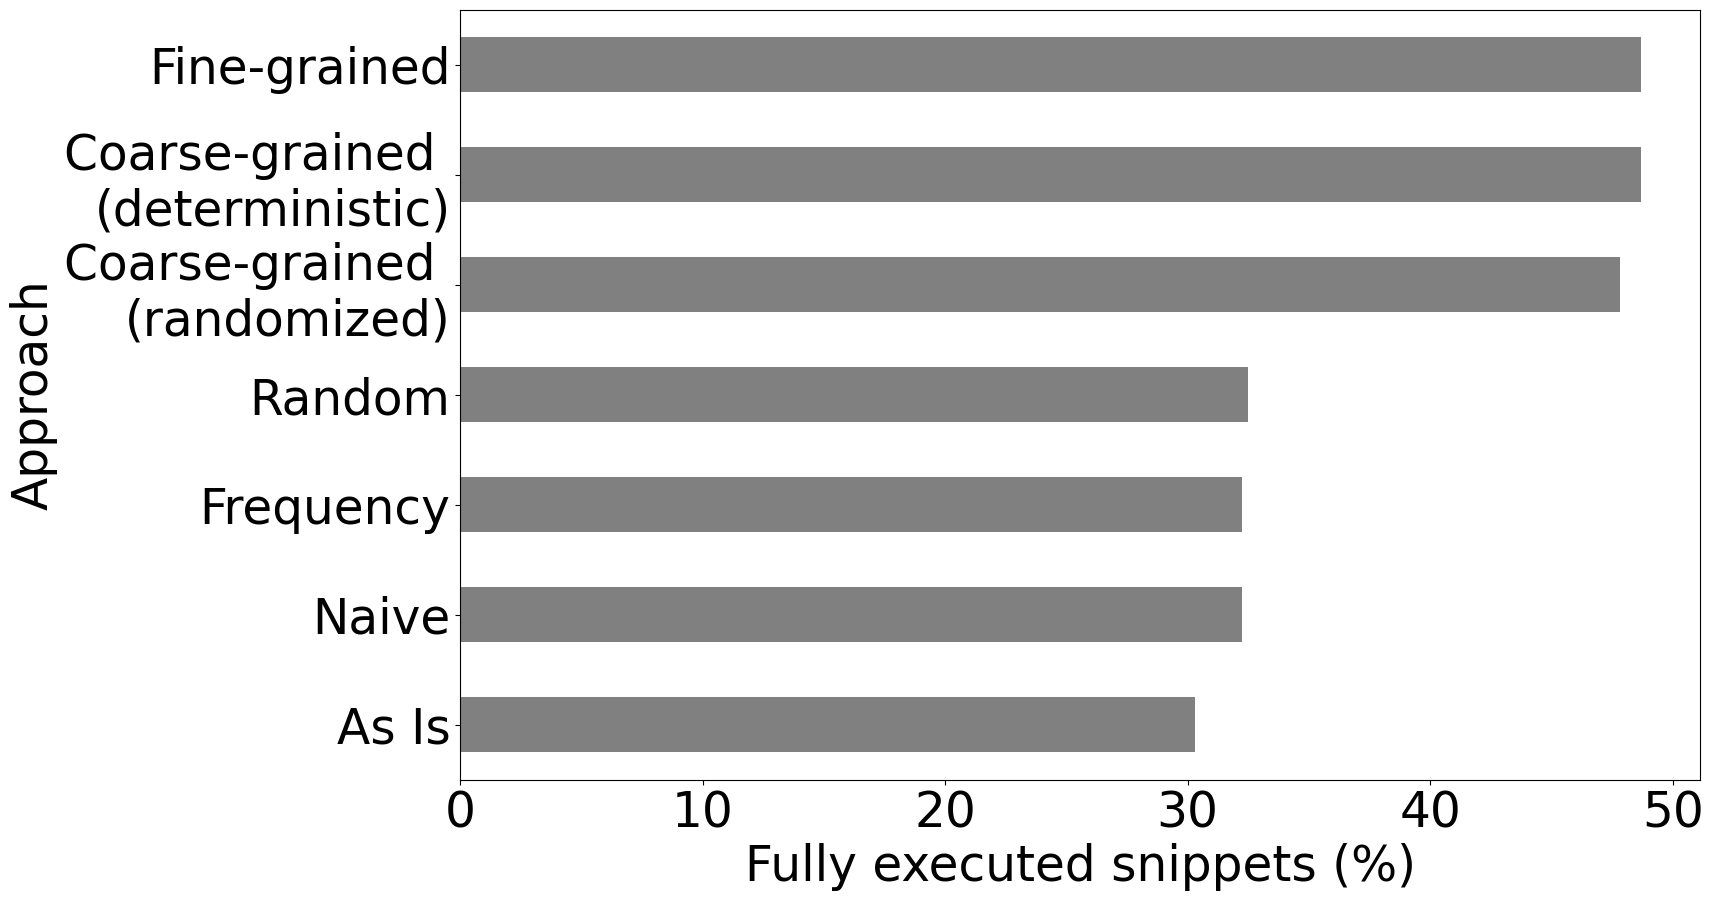

In [356]:
so_snippets_df_grouped = so_snippets_df_grouped.sort_values(by=['completely_executed'])
so_snippets_df_grouped['completely_executed'] = [x * 100 for x in so_snippets_df_grouped['completely_executed'] / 462]

plt.rcParams.update({'font.size': 35})
so_snippets_df_grouped.plot.barh(x='Approach', y=['completely_executed'], color='gray', legend=None)
plt.xlabel("Fully executed snippets (%)")
plt.gcf().set_size_inches(16, 10)
plt.savefig("snippets_dataset_full_LC.pdf", bbox_inches = "tight")

In [357]:
so_snippets_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,executed_lines,execution_time,completely_executed,Approach
predictor,,,,,,,,
AsIs,2722.0,19208.0,0.0,1293.0,6372.0,72.370769,30.303030,As Is
FrequencyValuePredictor,3228.0,16533.0,510.0,1354.0,5481.0,65.053628,32.251082,Naive
NaiveValuePredictor,3218.0,11585.0,510.0,1353.0,4249.0,47.802054,32.251082,Frequency
RandomPredictor,3244.0,11804.0,949.0,1351.0,4185.0,47.210649,32.467532,Random
CodeT5ValuePredictor_coarse_grained_randomized,3976.0,42026.0,4258.0,1648.0,8451.0,163.063255,47.835498,Coarse-grained \n(randomized)
CodeT5ValuePredictor_coarse_grained_deterministic,4036.0,41608.0,4267.0,1659.0,8323.0,160.959619,48.701299,Coarse-grained \n(deterministic)
CodeT5ValuePredictor_fine_grained,4036.0,44740.0,4127.0,1660.0,9030.0,187.429917,48.701299,Fine-grained


In [358]:
so_snippets_df_grouped["covered_lines_percentage_"] = so_snippets_df_grouped["covered_lines"] / [so_snippets_total_lines_df['total_lines'].sum() for e in so_snippets_df_grouped["covered_lines"]]
so_snippets_df_grouped["line_execution_time_"] = so_snippets_df_grouped["execution_time"] / so_snippets_df_grouped['executed_lines']
so_snippets_df_grouped

,covered_iids,total_uses,guided_uses,covered_lines,executed_lines,execution_time,completely_executed,Approach,covered_lines_percentage_,line_execution_time_
predictor,,,,,,,,,,
AsIs,2722.0,19208.0,0.0,1293.0,6372.0,72.370769,30.303030,As Is,0.403810,0.011358
FrequencyValuePredictor,3228.0,16533.0,510.0,1354.0,5481.0,65.053628,32.251082,Naive,0.422861,0.011869
NaiveValuePredictor,3218.0,11585.0,510.0,1353.0,4249.0,47.802054,32.251082,Frequency,0.422548,0.011250
RandomPredictor,3244.0,11804.0,949.0,1351.0,4185.0,47.210649,32.467532,Random,0.421924,0.011281
CodeT5ValuePredictor_coarse_grained_randomized,3976.0,42026.0,4258.0,1648.0,8451.0,163.063255,47.835498,Coarse-grained \n(randomized),0.514678,0.019295
CodeT5ValuePredictor_coarse_grained_deterministic,4036.0,41608.0,4267.0,1659.0,8323.0,160.959619,48.701299,Coarse-grained \n(deterministic),0.518114,0.019339
CodeT5ValuePredictor_fine_grained,4036.0,44740.0,4127.0,1660.0,9030.0,187.429917,48.701299,Fine-grained,0.518426,0.020756


In [359]:
so_snippets_df_grouped = so_snippets_df.groupby(by="predictor")[["covered_lines_percentage", "completely_executed", "line_execution_time"]].mean()
so_snippets_df_grouped

,covered_lines_percentage,completely_executed,line_execution_time
predictor,,,
AsIs,0.438320,0.303030,0.005194
CodeT5ValuePredictor_coarse_grained_deterministic,0.644107,0.487013,0.046232
CodeT5ValuePredictor_coarse_grained_randomized,0.636017,0.478355,0.046305
CodeT5ValuePredictor_fine_grained,0.644650,0.487013,0.047288
FrequencyValuePredictor,0.462618,0.322511,0.005729
NaiveValuePredictor,0.462524,0.322511,0.005421
RandomPredictor,0.467145,0.324675,0.005927


In [360]:
so_snippets_df_covered_lines_per_predictor = pd.DataFrame()
so_snippets_df_covered_lines_per_predictor['As Is'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Naive'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Frequency'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Random'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Coarse-grained \n(randomized)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Coarse-grained \n(deterministic)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Fine-grained'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor

,As Is,Naive,Frequency,Random,Coarse-grained \n(randomized),Coarse-grained \n(deterministic),Fine-grained
0,0.0,0.0,0.0,0.0,20.0,20.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,50.0,50.0,50.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...
457,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458,0.0,0.0,0.0,0.0,0.0,0.0,0.0
459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,0.0,0.0,0.0,0.0,0.0,0.0,0.0


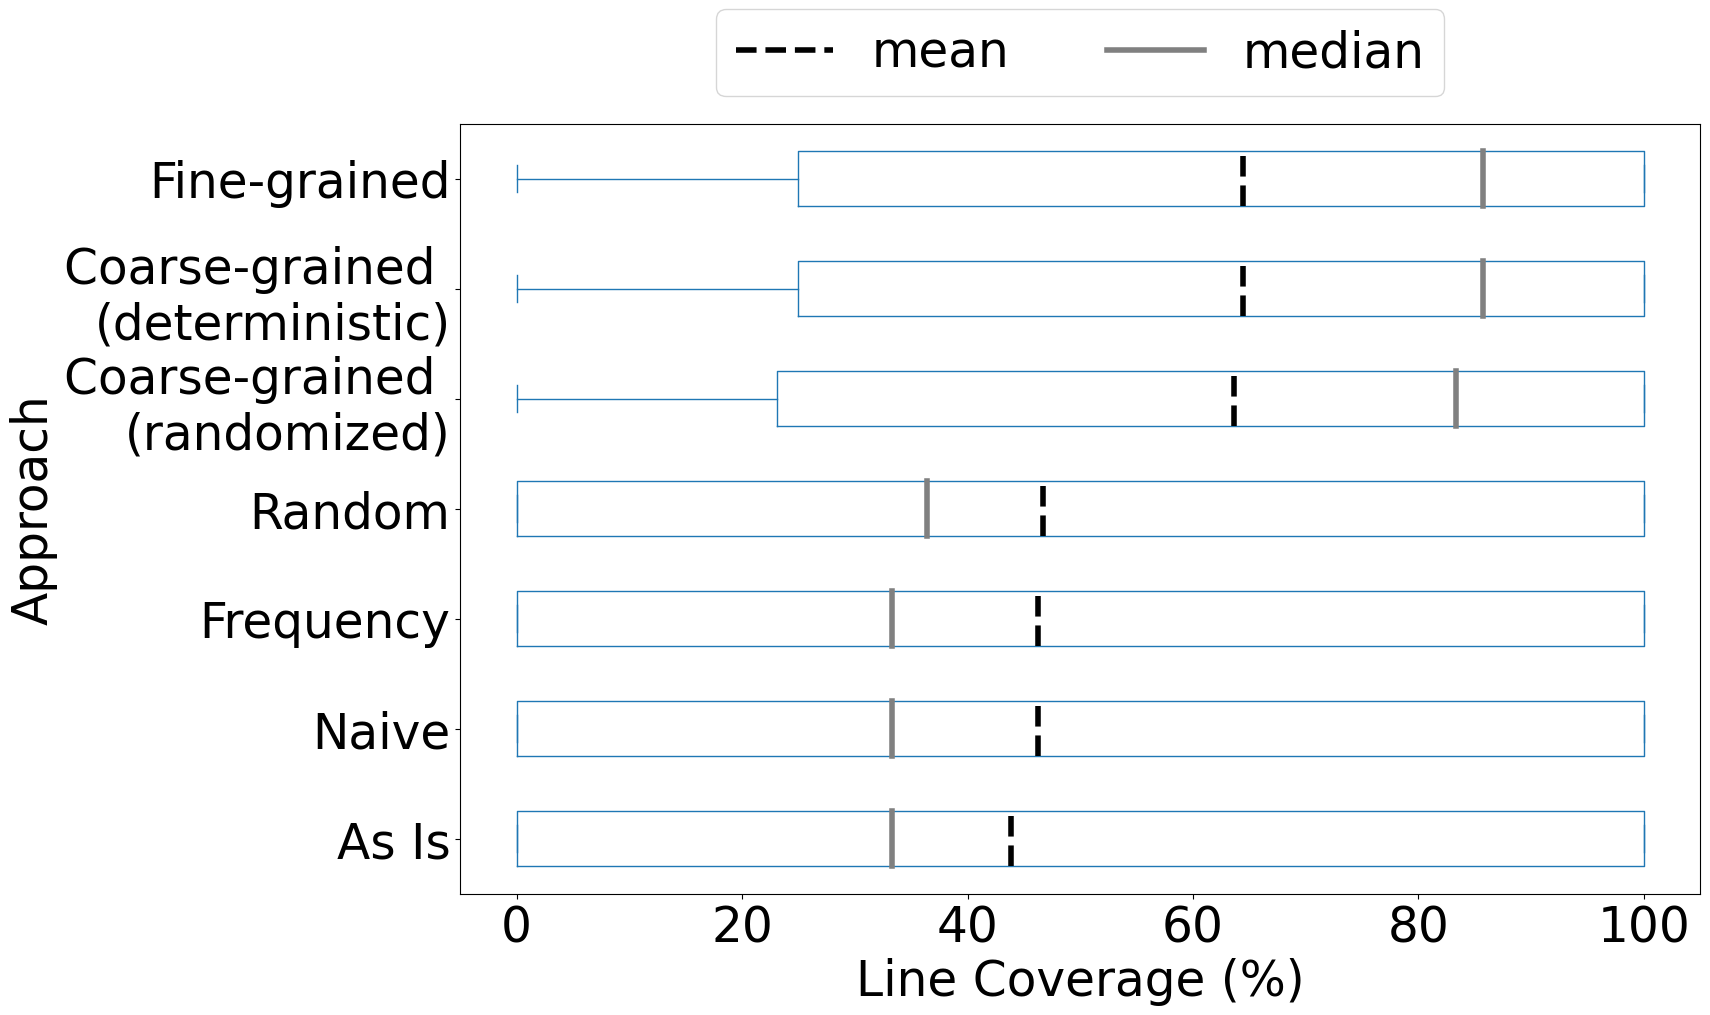

In [361]:
meanlineprops = dict(linestyle='--', linewidth=4, color='black')
medianlineprops = dict(linestyle='-', linewidth=4, color='gray')
flierprops = dict(marker='o',markerfacecolor='gray', markersize=12,
                  linestyle='none', markeredgecolor='gray')

#plt.figure(figsize=(36,6))
so_snippets_df_covered_lines_per_predictor.plot.box(
    showmeans=True, meanprops=meanlineprops, meanline=True, 
    medianprops=medianlineprops,
    vert=0,
    flierprops=flierprops);

plt.rcParams.update({'font.size': 35})
#plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Line Coverage (%)")
plt.ylabel("Approach")
plt.plot([], [], '--', linewidth=4, color='black', label='mean')
plt.plot([], [], '-', linewidth=4, color='gray', label='median')
#plt.plot([], [], 'o', markersize=12, color='gray', label='fliers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=2)
plt.gcf().set_size_inches(16, 10)
plt.savefig("snippets_dataset_LC.pdf", bbox_inches = "tight")

AsIs vs others

In [362]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [363]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [364]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [365]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [366]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [367]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_deterministic vs others

In [368]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [369]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [370]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [371]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_randomized vs others

In [372]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [373]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [374]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [375]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_fine_grained vs others

In [376]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [377]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [378]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [379]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)